# KNU 감성사전을 통한 단어의 긍정/부정을 판단하기

In [1]:
# ### KNU 한국어 감성사전 -DI LAB
# - SentiWord info.json 한국어 감성사전 제공

import json
import pandas as pd
from tqdm import tqdm

In [2]:
import sqlite3

In [117]:
conn = sqlite3.connect("practice.db") # practice.db 연결
c = conn.cursor() # db를 사용하기 위한 cursor

In [ ]:
c.execute("SELECT text FROM newspapers") # newspaper text(기사)의 내용을 추출

articles = [] # list 선언

for row in c.fetchall():  # table의 내용을 반복하여 추출
  articles.append(row)  # 해당 내용을 articles list에 넣음

print(articles[0])  # articles[i]가 text 등 모든 내용을 포함한 기사 1개

In [ ]:
!python -m pip install konlpy

In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [ ]:
!bash ./mecab.sh

In [10]:
from konlpy.tag import Mecab
mecab = Mecab()

In [11]:
# 의미 없는 단어(조사 등) 제외
stopwords = ['은', '도', '는', '다', '사', '의', '위', '제', '회', '등', '가', '이', '했', '한', '에', '애', '하', '보', '웃', '고', '곧', '정', '적', '순', '뜻', '용', '열', '유', '뜻', '잘', '못', '타', '희', '히', '점', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '개', '것', '명', '원', '세','에서', '이고', '라고', '다고', '라기', '라며', '면서', '라면서', '로써', '로서', '로', '으로', '뿐', '에서', '어야', '부터', '었', '았', '한다', '이다', '였다', '였었다', '|', '/','‘', '’', ',' , '“', '”', '.', '>', '<', ')', '(']

In [13]:
import re

In [14]:
def mec(i):
  words = list()
  for tok in articles[i]:
    temp = ''.join(tok)
    temp_re = re.sub('[^가-힣ㄱ-ㅎㅠ ]','', temp)
    encoded = mecab.morphs(temp_re)
    wd = [item for item in encoded if item not in stopwords]  # ('[^가-힣ㄱ-ㅎㅠ ]','')
    words.append(wd)

  return words

#### 사전에 단어 추가하는 부분(단어 추가하지 않을꺼면 필요없음)

In [15]:
SentiWord = pd.read_json('SentiWord_info.json') # json 파일 불러옴
SentiWord.to_csv('SentiWord_info.csv', index=False) # json 파일을 csv로 저장

In [ ]:
sw = pd.read_csv('SentiWord_info.csv')
sw

In [16]:
SentiWord = pd.read_csv('SentiWord_info.csv') # csv를 불러옴
SentiWord.loc[len(SentiWord)] = ['징용','징용',-2]  # 맨 끝에 징용 -2를 줌
SentiWord.loc[len(SentiWord)] = ['합의','합의',1] # 맨 끝에 합의 +1 을 줌
SentiWord.tail()

def pos_neg(word):
    tmp =SentiWord[(SentiWord['word']==word) | (SentiWord['word_root']==word)]
    try:
        word_res = (word,tmp['polarity'][tmp.index[0]])
    except:
        word_res = (word, 0)
    return word_res


In [40]:
len(articles)

100

In [64]:
for i in range(3):
  print(articles[i])

('로또복권 운영사 동행복권은 제974회 로또복권 추첨에서 ‘1, 2, 11, 16, 39, 44’이 1등 당첨번호로 뽑혔다고 31일 밝혔다. 2등 보너스 번호는 ‘32’다.당첨번호 6개를 모두 맞힌 1등 당첨자는 17명으로 13억1703만4523원씩 받는다. 당첨번호 5개와 보너스 번호가 일치한 2등은 66명으로 각 5653만9361원씩을, 당첨번호 5개를 맞힌 3등은 2636명으로 141만5629원씩을 받는다.당첨번호 4개를 맞힌 4등(고정 당첨금 5만원)은 12만9473명, 당첨번호 3개가 일치한 5등(고정 당첨금 5000원)은 214만9319명이다.이재덕 기자 duk@kyunghyang.com',)
('김학범 감독이 이끄는 한국 올림픽축구대표팀이 31일 일본 요코하마 스타디움에서 열린 2020 도쿄올림픽 남자축구 8강 멕시코와의 경기에서 3-6 의 굴욕적인 완패를 당했다.한국은 시작하자마자 멕시코에게 선제골을 내줬다. 전반 12분 왼쪽에서 올라온 크로스를 루이스 로모가 헤딩으로 떨궜고, 문전 앞에 있던 엔리 마르틴이 골로 연결시켰다. 반격에 나선 한국은 곧바로 동점골을 터뜨렸다. 전반 20분 이동경이 김진규의 패스를 받아 수비수를 한 명 제친 뒤 날카로운 왼발 슈팅으로 골을 성공시켰다. 조금씩 공세를 이어가던 한국은 전반 30분 일격을 맞고 다시 분위기가 꺾였다. 문전으로 침투하던 루이스 로모가 하프라인 왼쪽에서 올라온 롱패스를 잡아 골로 연결했다. 한국은 이어 전반 39분에 페널티킥을 허용해 세바스찬 코르도바에게 또 골을 내줬다.전반을 1-3으로 뒤지던 한국은 후반 시작과 함께 득점에 성공했다. 이동경이 페널티지역 왼쪽에서 강한 왼발 슈팅으로 골을 넣었다. 그러나 또 다시 멕시코에게 연이어 골을 내주며 무너졌다. 후반 9분 프리킥 세트피스 상황에서 문전으로 침투하던 마르틴에게 헤딩골을 내줬고, 후반 18분 코르도바에게 다시 왼발 슈팅을 허용해 또다시 골을 내줬다. 후반 39분에는 에두아르도 아기레에게 추가골까지 내주며 고개를 숙였다. 후반 추가시간 황

In [93]:
def rst(j):
  if j > 10:
      result = '긍정'
  elif j < - 10:
      reuslt = '부정'
  else:
      result = '중립'
  return result

In [94]:
rst(11)

'긍정'

In [121]:
from tqdm import tqdm
from collections import Counter 


for i in range(5):  # range는 len(articles) 
  article = mec(i)
  
  pos_list = []
  neg_list = []
  unkown_list = []
    
  po = []
  ne = []
  un = []
  for noun in tqdm(article[0], '긍/부정 나누기'):

      word_res = pos_neg(noun)
      res = len(pos_list) - len(neg_list) 

      if word_res[1] > 0:
          pos_list.append(word_res[0])
      elif word_res[1] < 0 :
          neg_list.append(word_res[0])
      else:
          unkown_list.append(word_res[0])
      
      pos_count = dict(Counter(pos_list).most_common()) # 단어별 갯수 계산 및 내림차순 정렬, 딕셔너리 구조
      neg_count = dict(Counter(neg_list).most_common())
      unkown_count = dict(Counter(unkown_list).most_common())
     
  po.append(pos_count)
  ne.append(neg_count)
  un.append(unkown_count)
  print(po)
  print(ne)
  print(un)


긍/부정 나누기: 100%|██████████| 55/55 [00:00<00:00, 333.85it/s]


[{'받': 2}]
[{}]
[{'번호': 8, '당첨': 6, '만': 5, '복권': 3, '맞힌': 3, '씩': 3, '로또': 2, '보너스': 2, '는다': 2, '일치': 2, '고정': 2, '당첨금': 2, '운영': 1, '동행': 1, '제회': 1, '추첨': 1, '뽑혔': 1, '일': 1, '밝혔': 1, '모두': 1, '당첨자': 1, '억만': 1, '각': 1, '이재덕': 1, '기자': 1}]


긍/부정 나누기: 100%|██████████| 246/246 [00:00<00:00, 334.92it/s]


[{'성공': 2, '받': 1, '함께': 1, '득점': 1, '신': 1}]
[{'분': 7, '해': 3, '아': 2, '어': 2, '강': 1, '굴욕': 1, '맞': 1, '넣': 1, '부족': 1, '늦': 1, '자': 1, '죄송': 1, '수': 1, '없': 1, '그': 1}]
[{'골': 12, '한국': 6, '에게': 6, '전반': 5, '던': 5, '후반': 5, '감독': 4, '내줬': 4, '다시': 4, '멕시코': 3, '왼쪽': 3, '헤딩': 3, '문전': 3, '왼발': 3, '슈팅': 3, '또': 3, '문제': 3, '김학범': 2, '올림픽': 2, '축구': 2, '도쿄': 2, '경기': 2, '시작': 2, '올라온': 2, '루이스': 2, '로모': 2, '마르틴': 2, '연결': 2, '시켰': 2, '이동경': 2, '패스': 2, '침투': 2, '허용': 2, '코르도바': 2, '내주': 2, '며': 2, '추가': 2, '까지': 2, '시간': 2, '기자': 2, '않': 2, '말': 2, '선수': 2, '보다': 2, '이끄': 1, '대표': 1, '팀': 1, '일': 1, '일본': 1, '요코하마': 1, '스타디움': 1, '열린': 1, '남자': 1, '완패': 1, '당했': 1, '자마자': 1, '선제골': 1, '크로스': 1, '떨궜': 1, '앞': 1, '있': 1, '엔리': 1, '반격': 1, '나선': 1, '곧바로': 1, '동점': 1, '터뜨렸': 1, '김진규': 1, '수비수': 1, '제친': 1, '뒤': 1, '날카로운': 1, '조금': 1, '씩': 1, '공세': 1, '일격': 1, '분위기': 1, '꺾였': 1, '하프': 1, '라인': 1, '롱': 1, '잡': 1, '이어': 1, '페널티킥을': 1, '세바스찬': 1, '뒤지': 1, '페널티지역': 1, '강한': 1, '그러나': 1, '연이': 

긍/부정 나누기: 100%|██████████| 203/203 [00:00<00:00, 323.52it/s]


[{'성공': 3, '안정': 1, '장점': 1, '뛰': 1, '통하': 1, '득점': 1}]
[{'공격': 10, '차': 2, '살': 2, '싸움': 2, '강': 1, '없': 1, '부진': 1, '따': 1, '어': 1, '맞': 1, '때': 1, '되': 1, '화': 1, '내': 1, '위기': 1, '코': 1, '아': 1, '벗어나': 1, '역전': 1, '해': 1}]
[{'세트': 6, '대표': 5, '팀': 5, '일본': 5, '김연경': 5, '박정아': 4, '여자': 3, '배구': 3, '도쿄': 3, '블로킹': 3, '오픈': 3, '기회': 3, '일': 2, '승부': 2, '상대': 2, '김희진': 2, '시간': 2, '며': 2, '분위기': 2, '네트': 2, '볼': 2, '다시': 2, '번': 2, '찾아왔': 2, '서브': 2, '마지막': 2, '꺾': 1, '진출': 1, '확정': 1, '한국': 1, '아리아케': 1, '아레나': 1, '열린': 1, '올림픽': 1, '조별': 1, '리그': 1, '조': 1, '본전': 1, '대접전': 1, '끝': 1, '스코어': 1, '이겼': 1, '다극': 1, '였': 1, '맞선': 1, '치': 1, '양보': 1, '명승부': 1, '이어졌': 1, '앞선': 1, '던': 1, '살아났': 1, '초반': 1, '점수': 1, '냈': 1, '힘있': 1, '코트': 1, '스파이크': 1, '꽂': 1, '조직력': 1, '바탕': 1, '갔': 1, '세터': 1, '다시로': 1, '카나미': 1, '효율': 1, '배분': 1, '속공': 1, '백': 1, '어택': 1, '골고루': 1, '활용': 1, '중반': 1, '째': 1, '개인': 1, '나왔': 1, '떨어졌': 1, '커버': 1, '않': 1, '펄쩍': 1, '오히려': 1, '긴장감': 1, '높인': 1, '단독': 1, '나오': 1

긍/부정 나누기: 100%|██████████| 450/450 [00:01<00:00, 311.52it/s]


[{'좋': 3, '받': 2, '휴식': 1, '역투': 1, '우월': 1, '득점': 1, '완전': 1, '철저': 1, '충분히': 1, '매끄럽': 1}]
[{'맞': 5, '해': 5, '아': 3, '내': 2, '야': 2, '어': 2, '송구': 2, '시': 1, '허': 1, '포': 1, '틀': 1, '낮': 1, '자': 1, '답답': 1, '상': 1, '자기': 1, '기': 1, '진': 1}]
[{'미국': 9, '루': 9, '타자': 8, '한국': 6, '대표': 6, '팀': 6, '경기': 6, '뒤': 6, '잡': 6, '홈런': 5, '안타': 5, '고영': 5, '표': 5, '지만': 5, '타구': 5, '감독': 4, '에게': 4, '말': 4, '등판': 4, '못했': 4, '야구': 3, '두': 3, '요코하마': 3, '조': 3, '초': 3, '뽑': 3, '투수': 3, '허용': 3, '대': 3, '몸': 3, '삼진': 3, '연속': 3, '이닝': 3, '오지환': 3, '양의지': 3, '볼넷': 3, '생각': 3, '김경문': 2, '일': 2, '일본': 2, '된': 2, '도미니카': 2, '공화국': 2, '땅볼': 2, '선발': 2, '선두': 2, '볼': 2, '번': 2, '던진': 2, '됐': 2, '이후': 2, '그러나': 2, '카운트': 2, '마운드': 2, '치': 2, '활약': 2, '던': 2, '상대': 2, '수비': 2, '걸': 2, '루수': 2, '기회': 2, '판정': 2, '향했': 2, '허경민': 2, '출루': 2, '오늘': 2, '연결': 2, '빨리': 2, '패했': 1, '중반': 1, '내준': 1, '방': 1, '승부': 1, '갈렸': 1, '이끄': 1, '가나가와현': 1, '스타디움': 1, '열린': 1, '도쿄': 1, '올림픽': 1, '조별': 1, '리그': 1, '차전': 1, '졌

긍/부정 나누기: 100%|██████████| 185/185 [00:00<00:00, 309.00it/s]

[{'킹': 1, '낫': 1}]
[{'힘': 4, '분': 2, '불리': 1, '시': 1, '가량': 1, '이야기': 1, '자': 1, '해': 1, '자리': 1, '아': 1, '부정': 1}]
[{'전': 14, '총장': 7, '위원장': 7, '윤': 7, '김': 6, '일': 4, '국민': 4, '입당': 4, '기자': 3, '전격': 2, '대선': 2, '전략': 2, '논의': 2, '보인다': 2, '오후': 2, '서울': 2, '있': 2, '나눴': 2, '두': 2, '앞': 2, '나가': 2, '말': 2, '했다': 2, '회동': 2, '후보': 2, '월': 2, '의원': 2, '윤석열': 1, '검찰': 1, '김종인': 1, '비상': 1, '대책': 1, '만났': 1, '전날': 1, '하루': 1, '만': 1, '메이커': 1, '만나': 1, '정권': 1, '교체': 1, '위한': 1, '이날': 1, '쯤': 1, '광화문': 1, '사무실': 1, '찾아가': 1, '측': 1, '관계자': 1, '통화': 1, '배석': 1, '없이': 1, '독대': 1, '해서': 1, '말씀': 1, '다면서': 1, '길': 1, '바란다고': 1, '덕담': 1, '안다고': 1, '지난': 1, '만난': 1, '조만간': 1, '찾': 1, '뵐': 1, '예고': 1, '된': 1, '배경': 1, '설명': 1, '조언': 1, '구했': 1, '그간': 1, '언론': 1, '인터뷰': 1, '통해': 1, '조기': 1, '의견': 1, '밝히': 1, '야권': 1, '단일': 1, '선출': 1, '다는': 1, '취지': 1, '바': 1, '따라': 1, '어떤': 1, '오갔': 1, '주목': 1, '된다': 1, '여의도': 1, '북카페': 1, '청년': 1, '정책': 1, '토론회': 1, '상상': 1, '오픈': 1, '세미나': 1, '참석': 1, '초선': 

In [116]:
conn.close

<function Connection.close>

In [104]:
conn = sqlite3.connect('mydb')

In [105]:
c = conn.cursor()

In [115]:
c.execute("CREATE TABLE IF NOT EXISTS wrd | (id integer PRIMARY KEY, pos text, neg text, neut text,)")

OperationalError: ignored

In [84]:
|print('긍정키워드 수:', len(pos_list),'개')
print('부정키워드 수:', len(neg_list),'개')
print('중립 또는 모름 키워드 수:', len(unkown_list),'개')

긍정키워드 수: 2 개
부정키워드 수: 15 개
중립 또는 모름 키워드 수: 168 개


index              긍정                       부정
  0      {긍정1:빈도, 긍정2:빈도}   {부정1:빈도, 부정2:빈도}
  1
  2
  3

In [46]:
tmp_dic = {}
for key, value in pos_count.items():
    if key not in stopwords:
        tmp_dic[key]=value

pos_count = tmp_dic

print(tmp_dic)

{'신': 300, '충분히': 200, '중요': 200, '적극': 100, '크': 100, '발전': 100, '해결': 100, '필요': 100, '가치': 100, '많': 100, '타당': 100, '노력': 100, '새로운': 100, '추진': 100, '좋': 100}


In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [37]:
### https://www.w3schools.com/colors/colors_hexadecimal.asp
def color_func(**kawargs):
    color="#0b1177"
    return color

In [38]:
img_path = 'good.jpg'
cloud_mask = np.array(Image.open(img_path))
cloud_mask.shape

img = Image.open(img_path)
img.size

(831, 789)

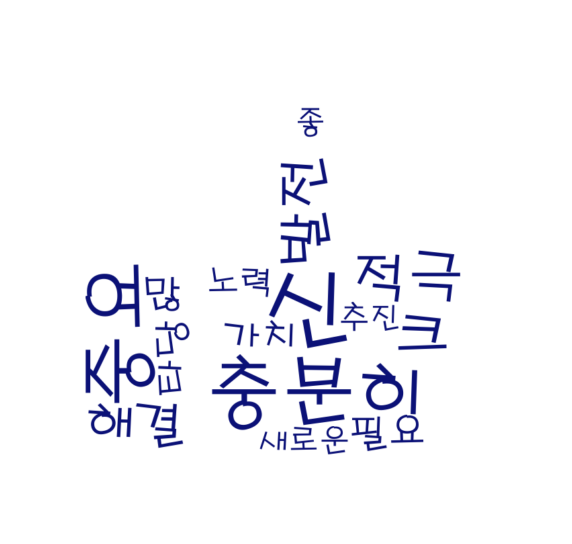

In [39]:
wordcloud = WordCloud(font_path="H2PORL.TTF",
                      background_color="white", mask=cloud_mask)
wc = wordcloud.generate_from_frequencies(pos_count)
plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
img_path = 'bad.jpg'
cloud_mask = np.array(Image.open(img_path))
cloud_mask.shape

img = Image.open(img_path)
img.size

(831, 789)

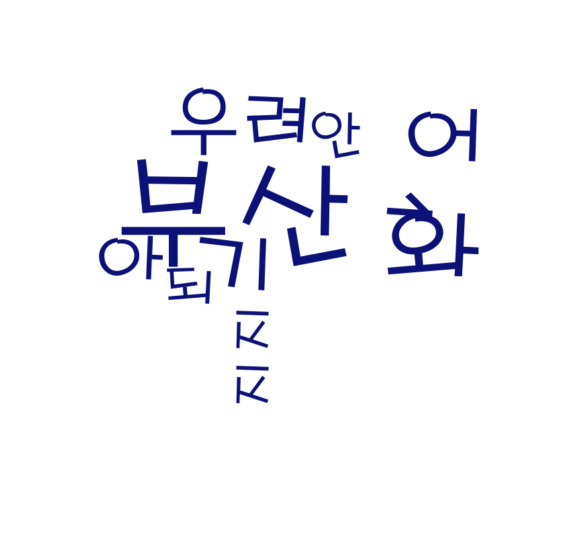

In [ ]:
wordcloud = WordCloud(font_path="H2PORL.TTF",
                      background_color="white", mask=cloud_mask)
wc = wordcloud.generate_from_frequencies(neg_count)
plt.figure(figsize=(10,15))
plt.imshow(wc.recolor(color_func=color_func), interpolation='bilinear')
plt.axis("off")
plt.show()